In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PR/world-population-by-country-2020.csv', thousands=',')
df = df.sort_values('Population 2020', ascending=False)

# clean
df['Net Change'] = pd.to_numeric(df['Net Change'], errors='coerce')

# convert string % to float
df['Urban Pop %'] = df['Urban Pop %'].str.rstrip("%")
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'], errors='coerce')
df['Urban Pop %'] = df['Urban Pop %'].astype(float)/100

In [8]:
df

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,0.61,18.47%
1,2,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,0.35,17.70%
2,3,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,0.83,4.25%
3,4,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,0.56,3.51%
4,5,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,0.35,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06%,3,50,100,NaN,N.A.,N.A.,0.10,0.00%
231,232,Falkland Islands,3480,3.05%,103,0,12170,NaN,N.A.,N.A.,0.66,0.00%
232,233,Niue,1626,0.68%,11,6,260,NaN,N.A.,N.A.,0.46,0.00%
233,234,Tokelau,1357,1.27%,17,136,10,NaN,N.A.,N.A.,0.00,0.00%


In [3]:
subset = df[:20].sort_values('Population 2020')

# calculate # for urban and rural pop. 
subset['urban'] = subset['Population 2020'] * subset['Urban Pop %']
subset['rural'] = subset['Population 2020'] - subset['urban']
subset['urban'] = subset['urban'].round()
subset['rural'] = subset['rural'].round()

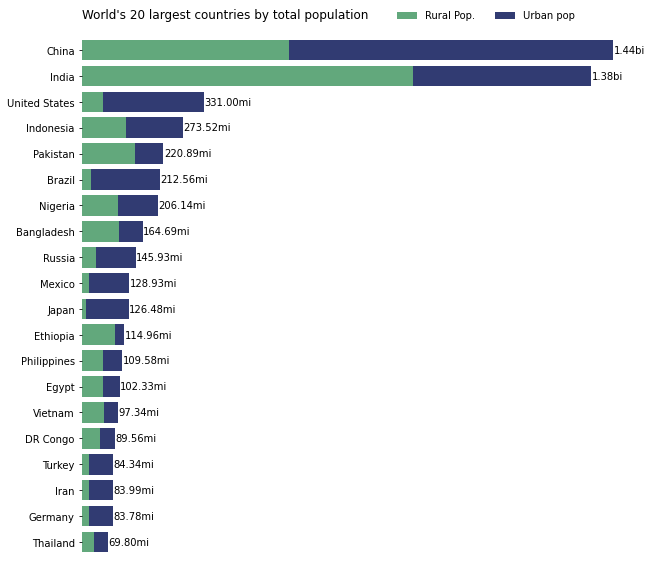

In [4]:
#plot
fig, ax = plt.subplots(1, figsize=(10,10))
ax.barh(subset['Country (or dependency)'], subset['rural'], color='#62A87C')
ax.barh(subset['Country (or dependency)'], subset['urban'], left=subset['rural'], color='#313B72')

# label bars with values
for idx, val in subset.iterrows():
    val = val['Population 2020']
    if(val > 10**9):
        plt.text(val+10**6, 19-idx,'{:,.2f}bi'.format(val/10**9), va='center')
    else:
        plt.text(val+10**6, 19-idx,'{:,.2f}mi'.format(val/10**6), va='center')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.ylim(-1,20)

# legend, title
plt.legend(['Rural Pop.', 'Urban pop'], ncol=2, loc='upper left', frameon=False, bbox_to_anchor=(.55,.9115), bbox_transform=fig.transFigure)
plt.title("World's 20 largest countries by total population", loc='left')

plt.show()

In [5]:
# get top 20 countries by Net Positive Change
subset_pos = df.sort_values('Net Change', ascending=False)[:20].sort_values('Net Change')

# get top 20 countries by Net Negative Change
subset_neg = df.sort_values('Net Change')[:20]

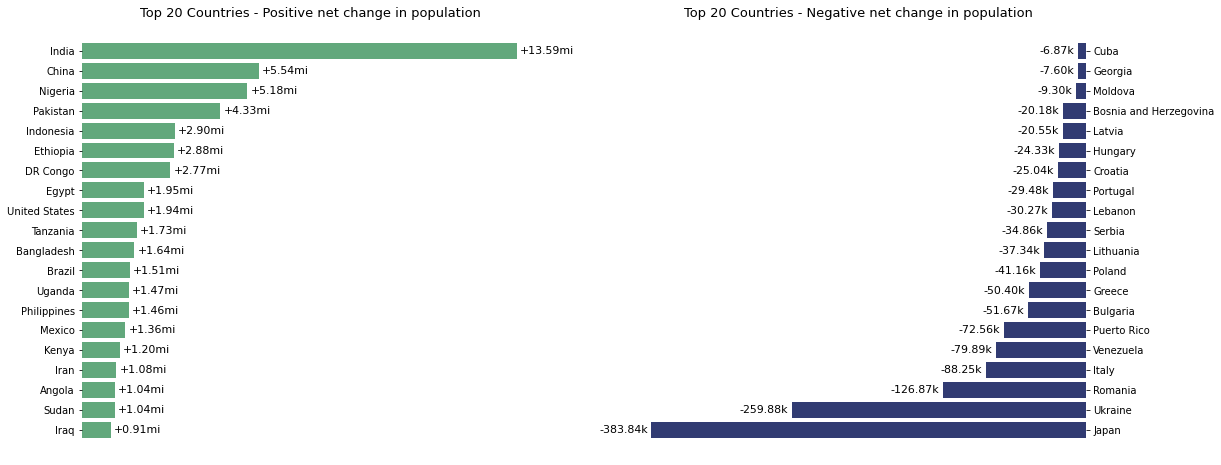

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.barh(subset_pos['Country (or dependency)'], subset_pos['Net Change'], color='#62A87C')
ax1.set_title('Top 20 Countries - Positive net change in population', loc='center', fontsize=13)

ax2.barh(subset_neg['Country (or dependency)'], subset_neg['Net Change'], color='#313B72')
ax2.set_title('Top 20 Countries - Negative net change in population', loc='center', fontsize=13)
ax2.yaxis.tick_right()

for ax in (ax1, ax2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    
for i, val in enumerate(subset_pos['Net Change']):
    ax1.text(val+10**5, i,'+{:,.2f}mi'.format(val/10**6), va='center', fontsize=11)
    
for i, val in enumerate(subset_neg['Net Change']):
    ax2.text(val-15**3, i,'{:,.2f}k'.format(val/10**3), va='center', fontsize=11, ha='right')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no                       235 non-null    int64  
 1   Country (or dependency)  235 non-null    object 
 2   Population 2020          235 non-null    int64  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    int64  
 5   Density  (P/Km²)         235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              222 non-null    float64
 11  World Share              235 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 23.9+ KB


In [10]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Country (or dependency)']= label_encoder.fit_transform(df['Country (or dependency)'])

In [11]:
df['Country (or dependency)'].unique()

array([ 43,  96, 224,  97, 158,  27, 151,  16, 170, 133, 105,  67, 164,
        61, 229,  55, 215,  98,  78, 208, 223,  72, 103, 207, 193, 142,
       108, 194,  44, 196, 220,   8,   2, 200, 221,  99,   0, 165,  36,
       140, 182, 226, 163,   5, 124, 141,  79, 232, 145, 228, 122,  35,
        54, 153,  11, 150, 205, 197,  31, 126, 169, 123,  42, 107, 233,
        86,  60, 204, 146, 183,  34,  40, 192, 234,  87, 171,  21,  32,
       214,  24,  19,  90,  50, 195,  59,  53,  81, 106, 166,  13, 202,
        92, 222,  94, 206,  18,  12, 161, 184, 102, 203, 210, 186,  93,
       112, 162,  30, 117, 114, 149, 111,  62, 216, 187,  56,  71,  46,
       189, 156, 157, 199,  48, 116, 100,  39, 148, 130, 160, 110,  49,
       135,  77,  64, 225,  25, 137,   9, 104, 168,   1, 167, 119, 143,
        76,  26,  75, 115, 154, 190,  88, 113,  15,  63, 213,  65, 209,
       131,  52,  66,  57,  70, 172,  45,  89,  23, 191, 121, 138, 120,
       231, 201,  33, 134, 125, 127,  29,  84,  20,  14, 129,  9

In [12]:
df

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,43,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,0.61,18.47%
1,2,96,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,0.35,17.70%
2,3,224,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,0.83,4.25%
3,4,97,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,0.56,3.51%
4,5,158,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,0.35,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,139,4992,0.06%,3,50,100,NaN,N.A.,N.A.,0.10,0.00%
231,232,69,3480,3.05%,103,0,12170,NaN,N.A.,N.A.,0.66,0.00%
232,233,152,1626,0.68%,11,6,260,NaN,N.A.,N.A.,0.46,0.00%
233,234,211,1357,1.27%,17,136,10,NaN,N.A.,N.A.,0.00,0.00%


In [13]:
df.isna().sum()

no                          0
Country (or dependency)     0
Population 2020             0
Yearly Change               0
Net Change                  0
Density  (P/Km²)            0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                13
World Share                 0
dtype: int64

In [17]:
mean_migrants = df['Migrants (net)'].mean()
mean_migrants

-5.442786069651741

In [28]:
mean_urbanpop = df['Urban Pop %'].mean()
mean_urbanpop

0.5944594594594593

In [25]:
median_migrants = df['Migrants (net)'].mean()
median_migrants

-143.54893617021276

In [22]:
df['Migrants (net)'].fillna(value=median_migrants,inplace=True)
df['Migrants (net)'].isna().sum()

0

In [29]:
df['Urban Pop %'].fillna(value=median_migrants,inplace=True)
df['Urban Pop %'].isna().sum()

0

In [55]:
df.drop(['Fert. Rate','Med. Age'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no                       235 non-null    int64  
 1   Country (or dependency)  235 non-null    int64  
 2   Population 2020          235 non-null    int64  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    int64  
 5   Density  (P/Km²)         235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           235 non-null    float64
 8   Urban Pop %              235 non-null    float64
 9   World Share              235 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 28.3+ KB


In [57]:
df

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Urban Pop %,World Share
0,1,43,1439323776,0.39%,5540090,153,9388211,-348399.0,0.610000,18.47%
1,2,96,1380004385,0.99%,13586631,464,2973190,-532687.0,0.350000,17.70%
2,3,224,331002651,0.59%,1937734,36,9147420,954806.0,0.830000,4.25%
3,4,97,273523615,1.07%,2898047,151,1811570,-98955.0,0.560000,3.51%
4,5,158,220892340,2.00%,4327022,287,770880,-233379.0,0.350000,2.83%
...,...,...,...,...,...,...,...,...,...,...
230,231,139,4992,0.06%,3,50,100,-960.0,0.100000,0.00%
231,232,69,3480,3.05%,103,0,12170,-960.0,0.660000,0.00%
232,233,152,1626,0.68%,11,6,260,-960.0,0.460000,0.00%
233,234,211,1357,1.27%,17,136,10,-960.0,0.000000,0.00%


In [59]:
df['Yearly Change'] = df['Yearly Change'].str.rstrip("%").astype(float)/100

In [60]:
df['World Share'] = df['World Share'].str.rstrip("%").astype(float)/100

In [66]:
df

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Urban Pop %,World Share
0,1,43,1439323776,0.0039,5540090,153,9388211,-348399.0,0.610000,0.1847
1,2,96,1380004385,0.0099,13586631,464,2973190,-532687.0,0.350000,0.1770
2,3,224,331002651,0.0059,1937734,36,9147420,954806.0,0.830000,0.0425
3,4,97,273523615,0.0107,2898047,151,1811570,-98955.0,0.560000,0.0351
4,5,158,220892340,0.0200,4327022,287,770880,-233379.0,0.350000,0.0283
...,...,...,...,...,...,...,...,...,...,...
230,231,139,4992,0.0006,3,50,100,-960.0,0.100000,0.0000
231,232,69,3480,0.0305,103,0,12170,-960.0,0.660000,0.0000
232,233,152,1626,0.0068,11,6,260,-960.0,0.460000,0.0000
233,234,211,1357,0.0127,17,136,10,-960.0,0.000000,0.0000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no                       235 non-null    int64  
 1   Country (or dependency)  235 non-null    int64  
 2   Population 2020          235 non-null    int64  
 3   Yearly Change            235 non-null    float64
 4   Net Change               235 non-null    int64  
 5   Density  (P/Km²)         235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           235 non-null    float64
 8   Urban Pop %              235 non-null    float64
 9   World Share              235 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 28.3 KB


In [67]:
x=df.drop(['Migrants (net)'],axis=1)
y=df['Migrants (net)']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

0.2127659574468085

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test,y_test)

0.2127659574468085